# Gym Taxi

In [ ]:
#########################################################################
## COMPROBAR GPU ASIGNADA EN COLABORATORY
#########################################################################
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Jul 25 11:51:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    45W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#########################################################################
## MONTAR DRIVE
#########################################################################
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#########################################################################
## LIBRERÍAS NECESARIAS
#########################################################################
import tensorflow as tf
import gymnasium as gym
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
from tensorflow.keras.layers import concatenate
from tensorflow.keras import backend as K
import numpy as np
import keras
from keras import layers
import copy
from sklearn.model_selection import train_test_split

import sys

import os
from stable_baselines3.common.vec_env import DummyVecEnv

In [ ]:
############################################################################
## Variables globales
###########################################################################
BATCH_SIZE=32
EPOCHS=100
EPISODES=2500
EPISODES_EVALUATE_G=100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Discriminador

## Red neuronal del discriminador

In [ ]:
# Red neuronal del Discriminador
discriminator=keras.Sequential(
    [
        keras.Input(shape=(500,6,1)),
        layers.Conv2D(64,kernel_size=3,strides=2,padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=3, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator_net"

)
discriminator.summary()

Model: "discriminator_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 3, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 250, 3, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 2, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 125, 2, 128)       0         
                                                                 
 flatten (Flatten)           (None, 32000)             0         
                                                                 
 dropout (Dropout)           (None, 32000)             0         
                                                                 
 dense (Dense)               (None, 1)           

# Generador

## Clase del generador

In [ ]:
# Clase del Generador: política con su optimizador PPO
# Observesé que cada generador implementa una política distinta, por tanto, se ha decidido llamar a la clase Policy_net en lugar de generator
class Q_learning:
    def __init__(self, env):
        """
        name: string
        env: gym env
        """

        # -Entorno
        self.env=env
        env.reset()

        # -Tablas Q[state,action,episodes]
        self.Q=np.zeros([env.observation_space.n,env.action_space.n])
        self.Q_episodes=EPISODES

        # Nuestro objetivo es obtener un generador que maximice la recompensa
        # Entonces tendriamos un buen Q-learning
        self.rewardMeans=-500
        self.rewards=[]
        self.TotalReward=0

    def getQ(self):
        return Q

    # Escoge la acción aplicando Q-learning
    def Q_create(self, episodes=EPISODES, alpha=0.7):

        datos=[]
        self.rewards=[]
        self.Q_episodes=episodes

        # Para cada episodio se obtiene una aproximación Q(estados,acciones) con el algoritmo Q-learning
        for episode in range(0,self.Q_episodes ):
            terminated=False
            truncated=False
            R=0.0
            reward=0.0

            state,_=env.reset()

            # Interactuamos con el Entorno hasta que lleguemos a un estado final
            while terminated!= True and truncated!=True:
              ##### PASO 1: Selecionar la mejor acción para el estado actual
              action=np.argmax(Q[state])
              ##### PASO 2: Ejecutar la acción y pasar al estado siguiente, obtener la recompensa de ejecutar dicha acción.
              state2,reward,terminated,truncated,info=env.step(action)
              ##### PASO 3: Actualización de tablas Q
              Q[state,action]+=alpha*(reward+np.max(Q[state2])-Q[state,action])
              ##### PASO 4: Actualización de recompensa acumulada
              R+=reward
              ##### PASO 5: el estado siguiente pasa a ser el estado actual
              state=state2

            self.rewards.append(R)
            self.TotalReward=R

            # Vemos para el episodio, su recompensa acumulada que es lo que se trata de maximizar
            print("Episode  {} Total reward: {}".format(episode,R))

            #Por cada episodio almaceno su condiguración, almaceno la Q obtenida con el Algoritmo
            datos.append(Q)


        self.rewardMeans=sum(self.rewards)/len(self.rewards)

        # Muestro
        plt.plot(range(self.Q_episodes),self.rewards)
        plt.show()

        self.Q=datos

        return datos

    # La misma función que antes pero sin los print
    # Escoge la acción aplicando Q-learning
    def Q_create_t(self, episodes=EPISODES, alpha=0.7):

        datos=[]
        self.rewards=[]
        self.Q_episodes=episodes
        # Para cada episodio se obtiene una aproximación Q(estados,acciones) con el algoritmo Q-learning
        for episode in range(0,self.Q_episodes ):
            terminated=False
            truncated=False
            R=0.0
            reward=0.0

            state,_=env.reset()

            #Interactuamos con el Entorno hasta que lleguemos a un estado final
            while terminated!= True and truncated!=True:
                ##### PASO 1: Selecionar la mejor acción para el estado actual
                action=np.argmax(Q[state])
                ##### PASO 2: Ejecutar la acción y pasar al estado siguiente, obtener la recompensa de ejecutar dicha acción.
                state2,reward,terminated,truncated, info=env.step(action)
                ##### PASO 3: Actualización de tablas Q
                Q[state,action]+=alpha*(reward+np.max(Q[state2])-Q[state,action])
                ##### PASO 4: Actualización de recompensa acumulada
                R+=reward
                ##### PASO 5: el estado siguiente pasa a ser el estado actual
                state=state2

            self.rewards.append(R)
            self.TotalReward=R

            #Por cada episodio almaceno su condiguración, almaceno la Q obtenida con el Algoritmo
            datos.append(Q)


        self.rewardMeans=sum(self.rewards)/len(self.rewards)

        # Muestro
        # plt.plot(range(self.Q_episodes),self.rewards)
        # plt.show()

        self.Q=datos

        return datos

    def get_obs(self):
        return self.obs

    def get_TotalReward(self):
        return self.TotalReward

    def get_RewardMean(self):
        return self.rewardMeans

# GAN

Trabaja con las tablas Q como si fuesen imágenes.

**Objetivo**: construir un generador capaz de reproducir tablas Q falsas indistinguibles de las tablas Q reales.

Ya que de esta forma, hemos obtenido politicas falsas puesto que de una tabla Q se puede extraer el comportamiento de una Agente sobre un entorno y un estado específico, simplemente calculando el el la acción que produce un valor maximo un Q[state].

In [ ]:
################################################################################
# Declaramos optimizadores y funciones de pérdida del generador-discriminador
#################################################################################
generator_optimizer = tf.keras.optimizers.Adam(
	learning_rate=0.0001, beta_1=0.5, beta_2=0.9)

discriminator_optimizer =tf.keras.optimizers.Adam(
	learning_rate=0.0001, beta_1=0.5, beta_2=0.9)

def discriminator_loss(real_img, fake_img):
    real_loss = tf.reduce_mean(real_img)
    fake_loss = tf.reduce_mean(fake_img)
    return fake_loss - real_loss

def generator_loss(fake_img):
    return -tf.reduce_mean(fake_img)


In [ ]:
####################################################################################################################
# CLASE GAN
####################################################################################################################
class GAN(keras.Model):
    # Constructor
    def __init__(self, discriminator, generator, discriminator_extra_steps=3):
        super().__init__()
        self.discriminator = discriminator
        self.generator=generator
        self.i=0
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")
        self.d_steps = discriminator_extra_steps
    # Compila el modelo GAN inicializando los optimizadores y la función de pérdida del modelo GAN
    def compile(self,d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super(GAN, self).compile(run_eagerly=True)
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    # Devuelve las métricas obtenidas con el generador y discriminador
    @property
    def metrics(self):
        return [self.d_loss_metric,self.g_loss_metric]

    # Evaluación del Discriminador
    def evaluate_D(self, X_test):
        batch_size = X_test.shape[0]  #¿Debería ser batch_size de X_train?

        Q_fakes=self.generator.Q_create_t(episodes=batch_size)

        # Convertir a tensores
        fakes = tf.stack(Q_fakes)

        # Compilamos el discriminador como CNN
        self.discriminator.compile(optimizer=self.d_optimizer, loss=self.d_loss_fn, metrics=['accuracy'])

        # Evaluamos como CNN
        loss_real, acc_real=self.discriminator.evaluate(X_test[0:batch_size], tf.ones((batch_size,1)), verbose=1)

        loss_fake, acc_fake=self.discriminator.evaluate(fakes[0:batch_size],tf.ones((batch_size,1)), verbose=1)

        print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100,acc_fake*100))
        print('>Loss real: ')
        print(loss_real)
        print('>Loss fake: ')
        print(loss_fake)


    # Evaluación del generador
    def evaluate_G(self):

      # Lista donde amacenaremos la recompensa acumulada de cada episodio.
      # NUESTRO OBJETIVO: Agente aprenda a tomar las acciones que maximicen la recompensa
      rewards=[]

      Q_fakes=generator.Q_create_t(episodes=EPISODES_EVALUATE_G)

      Q_fakes = tf.stack(Q_fakes)

      # Creamos el entorno y lo inicializamos para obtener el estado inicial
      env=gym.make("Taxi-v3",render_mode='rgb_array')


      # Para cada episodio, el Agente se mueve por el Entorno mediante acciones hasta llegar a un estado final
      # siguiendo la política que se ha aprendido en el entrenamiento de la GAN
      for episode in range(EPISODES_EVALUATE_G):
          terminated=False
          truncated=False
          R=0.0
          reward=0.0

          # Estado inicial del juego
          state,_=env.reset()

          #Interactuamos con el Entorno hasta que lleguemos a un estado final
          while terminated!= True and truncated!=True:
              action= np.where(Q_fakes[episode][state] == np.max(Q_fakes[episode][state]) )
              state,reward,terminated,truncated,info=env.step(action[0][0])

              # Incremento la recompensa del episodio i al haber ejecutado el step
              R+=reward

          rewards.append(R)
          # Vemos para el episodio, su recompensa acumulada que es lo que se trata de maximizar
          print("Episode  {} Total reward: {}".format(episode,R))

      # Cierro el entorno
      env.close()

      # Muestro las recompensas obtenidas en cada episodio
      plt.plot(range(EPISODES_EVALUATE_G),rewards)
      plt.show()

      return np.mean(rewards)

    def train_step(self, X_train):
        # Ojo no tenemos la misma cantidad de datos verdaderos y falsos, por eso calculamos len_real y len_fakes
        # No podemos controlar la creación de x secuencias [s,a] ya que generaremos tantas secuencias como se
        # necesiten para finalizar el juego
        if isinstance(X_train, tuple):
          X_train = X_train[0]

        batch_size = tf.shape(X_train)[0]

        print(batch_size)


        #######  PASO 1:  ENTRENAMIENTO DEL DISCRIMINADOR ##############################################


        # Entrenamiento del discriminador con las Q falsas y Q reales
        with tf.GradientTape() as tape:
            fakes=self.generator.Q_create_t(episodes=batch_size)

            fakes = tf.stack(fakes)

            fake_logits=self.discriminator(fakes)
            real_logits = self.discriminator(X_train)

            # Calculamos la pérdida del discriminador usando los logits de la imagen real y falsa
            d_loss = self.d_loss_fn(real_img=real_logits, fake_img=fake_logits)

        # Calculo del gradiente y actualización del gradiente
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)

        self.d_optimizer.apply_gradients(
          zip(grads, self.discriminator.trainable_weights)
        )


        ############# PASO 2: ENTRENAMIENTO DEL GENERADOR=POLÍTICA  ##############################

        with tf.GradientTape() as tape:
          # Generamos la imagen falsa a traves del generador
          fakes = self.generator.Q_create_t()
          # Convertir a tensores
          fakes = tf.stack(fakes)
          # Obtenemos los logits del discriminador en la imagen falsa
          gen_img_logits = self.discriminator(fakes)
          # Calculamos la función de pérdida del generador
          g_loss = self.g_loss_fn(gen_img_logits)


        # Actualizamos la métrica del discriminador
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)

        # Por cada 10 epoca quiero conocer los datos de recompensa
        if (self.i+1)%10==0:
          rewardMean=self.evaluate_G()
          print('\nEpoca:', self.i)
          print('\nRecompensa de Media:', rewardMean, '\n')

        self.i=self.i+1

        return {"d_loss": self.d_loss_metric.result(),
                    "g_loss": self.g_loss_metric.result()}


# Lectura de base de datos: tablas Q reales

In [ ]:
# Creación de entorno de simulación del juego Taxi-v3, usamos el argumento render_mode='rgb_array' ya que configura
# el modo de renderizado del entorno para que genere una representación en formato de matriz RGB.
env=gym.make("Taxi-v3",render_mode='rgb_array')
# Establecemos el estado inicial del entorno haciendo uso de una semilla para reproducir el mismo estado inicial en diferentes ejecuciones.
observation,_ = env.reset()

# Inicialización de la matriz Q y del nº de episodios
Q=np.zeros([env.observation_space.n,env.action_space.n])

In [ ]:
##################################################################################################################
#  Devuelve una lista con las matrices Q(estados,acciones) obtenidas con el algoritmo Qlearning
#  en cada episodio. Como se ha definido en las variables globales EPISODES=25,esto es tendremos 25 episodios, esta lista tendrá 25 matrices de la forma
#  (500,6), ya que tenemos 500 estados y 6 acciones en taxi. Más adelante, convertiremos esta lista en un tensor con objeto
#  de poder trabajar con esta en modelos CNN.
#
# Argumentos:
# -env -> Entorno
# -state_inital -> Estado inicial del Agente
# -Q -> Configuración inicial de la matriz Q(estados,acciones).
# -episodes -> numero de episodios, esto es, número de veces que se ejecutarña Q-learning.
#              En cada episodio se obtendrá una matrix Q(estados,acciones).
#
#################################################################################################################
def QLearning(env,Q,episodes,alpha=0.7):
    rewards=[]

    datos=[]


    # Para cada episodio se obtiene una aproximación Q(estados,acciones) con el algoritmo Q-learning
    for episode in range(0,episodes ):
        terminated=False
        truncated=False
        R=0.0
        reward=0.0
        state,_ =env.reset()

        #Interactuamos con el Entorno hasta que lleguemos a un estado final
        while terminated!= True and truncated!=True:
            ##### PASO 1: Selecionar la mejor acción para el estado actual
            action=np.argmax(Q[state])
            ##### PASO 2: Ejecutar la acción y pasar al estado siguiente, obtener la recompensa de ejecutar dicha acción.
            state2,reward,terminated,truncated,info=env.step(action)
            ##### PASO 3: Actualización de tablas Q
            Q[state,action]+=alpha*(reward+np.max(Q[state2])-Q[state,action])
            ##### PASO 4: Actualización de recompensa acumulada
            R+=reward
            ##### PASO 5: el estado siguiente pasa a ser el estado actual
            state=state2

        rewards.append(R)

        #Vemos para el episodio, su recompensa acumulada que es lo que se trata de maximizar
        print("Episode  {} Total reward: {}".format(episode,R))

        #Por cada episodio almaceno su condiguración, almaceno la Q obtenida con el Algoritmo
        datos.append(Q)

    # Muestro
    plt.plot(range(episodes),rewards)
    plt.show()

    return datos


Episode  0 Total reward: -524.0
Episode  1 Total reward: -596.0
Episode  2 Total reward: -407.0
Episode  3 Total reward: -524.0
Episode  4 Total reward: -578.0
Episode  5 Total reward: -290.0
Episode  6 Total reward: -578.0
Episode  7 Total reward: -344.0
Episode  8 Total reward: -596.0
Episode  9 Total reward: -542.0
Episode  10 Total reward: -461.0
Episode  11 Total reward: -596.0
Episode  12 Total reward: -287.0
Episode  13 Total reward: -497.0
Episode  14 Total reward: -434.0
Episode  15 Total reward: -524.0
Episode  16 Total reward: -443.0
Episode  17 Total reward: -165.0
Episode  18 Total reward: -533.0
Episode  19 Total reward: -263.0
Episode  20 Total reward: -218.0
Episode  21 Total reward: -209.0
Episode  22 Total reward: -200.0
Episode  23 Total reward: -317.0
Episode  24 Total reward: -54.0
Episode  25 Total reward: -425.0
Episode  26 Total reward: -506.0
Episode  27 Total reward: -200.0
Episode  28 Total reward: -143.0
Episode  29 Total reward: -200.0
Episode  30 Total rew

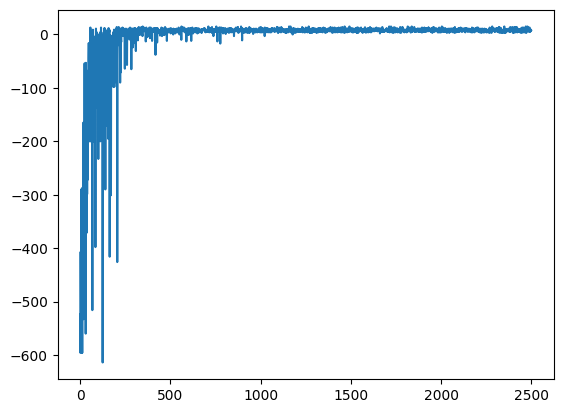

In [ ]:
# datos definirá una lista donde se almacenarán matrices 2D de la forma (500,6), esto es, en cada posición i tendremos
# la matriz Q(estados, acciones) para el episodio i
datos=[]

# Aplico la función Q-learning para obtener la aproximación de las matrices Q(estados, acciones) para los 25 episodios
datos=QLearning(env,Q,EPISODES)

# Cierro el entorno
env.close()

In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test = train_test_split(datos, test_size=0.2, random_state=0)

# Imprime el número de elementos en el conjuntos de entrenamiento y prueba
print('Nº de matrices Q(ESTADOS,ACCIONES) en el conjunto de entrenamiento:', len(X_train))
print('Nº de matrices Q(ESTADOS,ACCIONES) en el conjunto de prueba:', len(X_test))


Nº de matrices Q(ESTADOS,ACCIONES) en el conjunto de entrenamiento: 2000
Nº de matrices Q(ESTADOS,ACCIONES) en el conjunto de prueba: 500


In [ ]:
XTrain=np.zeros((len(X_train),env.observation_space.n,env.action_space.n))
XTest=np.zeros((len(X_test),env.observation_space.n,env.action_space.n))

# Pasar de listas a array numpy con el tamaño que deseamos
for i in range(len(X_train)):
    XTrain[i,:,:]=X_train[i]

for i in range(len(X_test)):
    XTest[i,:,:]=X_test[i]

# Convertir a tensores
XTrain = tf.stack(XTrain)
XTest = tf.stack(XTest)

# EXPERIMENTACIÓN CON LA GENERACIÓN SINTÉTICA DE TABLAS Q-LEARNING A TRAVES DE MODELOS GANS



## Definición de generador y generación de tablas Q falsas

Episode  0 Total reward: 9.0
Episode  1 Total reward: 12.0
Episode  2 Total reward: 10.0
Episode  3 Total reward: 5.0
Episode  4 Total reward: 5.0
Episode  5 Total reward: 9.0
Episode  6 Total reward: 5.0
Episode  7 Total reward: 7.0
Episode  8 Total reward: 7.0
Episode  9 Total reward: 12.0
Episode  10 Total reward: 5.0
Episode  11 Total reward: 9.0
Episode  12 Total reward: 6.0
Episode  13 Total reward: 3.0
Episode  14 Total reward: 7.0
Episode  15 Total reward: 9.0
Episode  16 Total reward: 7.0
Episode  17 Total reward: 7.0
Episode  18 Total reward: 6.0
Episode  19 Total reward: 10.0
Episode  20 Total reward: 9.0
Episode  21 Total reward: 12.0
Episode  22 Total reward: 8.0
Episode  23 Total reward: 9.0
Episode  24 Total reward: 8.0
Episode  25 Total reward: 11.0
Episode  26 Total reward: 8.0
Episode  27 Total reward: 6.0
Episode  28 Total reward: 9.0
Episode  29 Total reward: 4.0
Episode  30 Total reward: 9.0
Episode  31 Total reward: 6.0
Episode  32 Total reward: 7.0
Episode  33 To

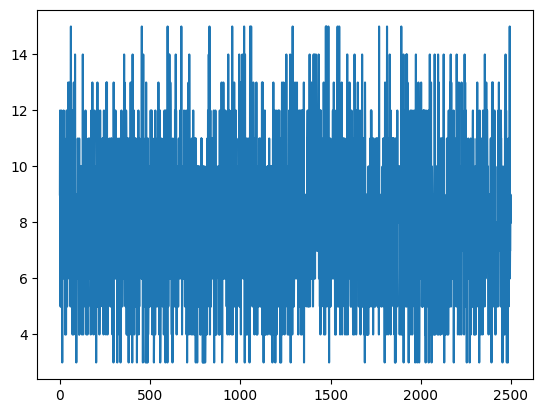

In [ ]:
env=gym.make("Taxi-v3",render_mode='rgb_array')

obs,_= env.reset()

# Generador
generator=Q_learning(env)

# Creación de datos fasos, tablas Q falsas y vemos por pantalla la recompensa acumulada que tendra cada Q[S,A]
datos_fakes=generator.Q_create()

## Definición de GAN

In [ ]:
gan=GAN(discriminator=discriminator,generator=generator)

## Compilación de GAN

In [ ]:
gan.compile(d_optimizer=discriminator_optimizer,
			 g_optimizer=generator_optimizer,
             g_loss_fn=generator_loss,
             d_loss_fn=discriminator_loss,)


## Entrenamiento de GAN

Epoch 1/100
tf.Tensor(2000, shape=(), dtype=int32)


1/1 [==============================] - 19s 19s/step - d_loss: -0.0025 - g_loss: -0.3446
Epoch 2/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 6s 6s/step - d_loss: -0.0039 - g_loss: -0.5117
Epoch 3/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0056 - g_loss: -0.5611
Epoch 4/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0068 - g_loss: -0.4143
Epoch 5/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0079 - g_loss: -0.5534
Epoch 6/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0092 - g_loss: -0.4533
Epoch 7/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0105 - g_loss: -0.5348
Epoch 8/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 

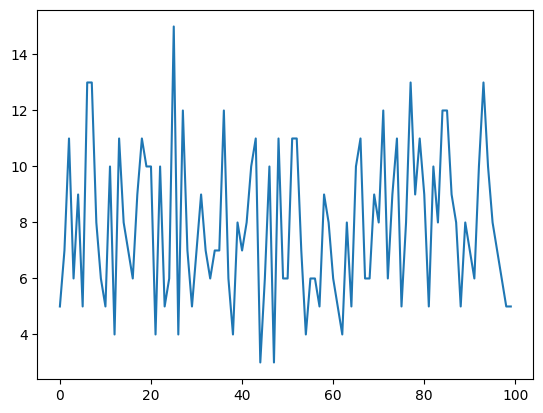


Epoca: 9

Recompensa de Media: 7.88 

1/1 [==============================] - 8s 8s/step - d_loss: -0.0137 - g_loss: -0.3769
Epoch 11/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0149 - g_loss: -0.5469
Epoch 12/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0166 - g_loss: -0.4855
Epoch 13/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0180 - g_loss: -0.4670
Epoch 14/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0192 - g_loss: -0.5346
Epoch 15/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0203 - g_loss: -0.4068
Epoch 16/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 6s 6s/step - d_loss: -0.0211 - g_loss: -0.6116
Epoch 17/100
tf.Tensor(2000, shape=(), dtype=in

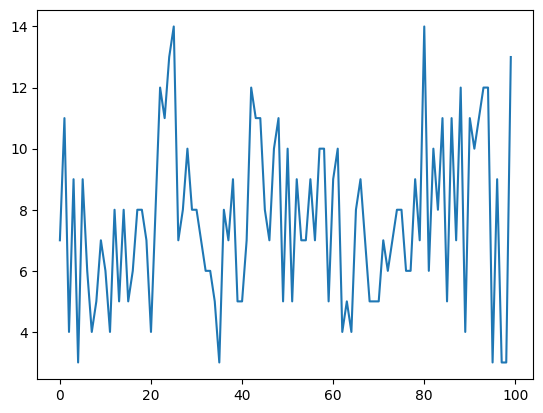


Epoca: 19

Recompensa de Media: 7.65 

1/1 [==============================] - 8s 8s/step - d_loss: -0.0266 - g_loss: -0.4608
Epoch 21/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0278 - g_loss: -0.5279
Epoch 22/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0289 - g_loss: -0.4143
Epoch 23/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0298 - g_loss: -0.5908
Epoch 24/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0302 - g_loss: -0.3679
Epoch 25/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0311 - g_loss: -0.5582
Epoch 26/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0333 - g_loss: -0.4561
Epoch 27/100
tf.Tensor(2000, shape=(), dtype=i

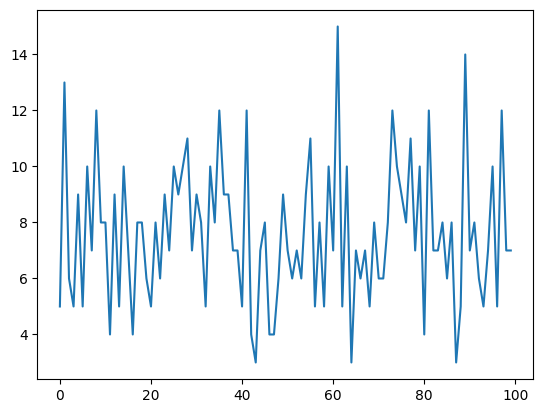


Epoca: 29

Recompensa de Media: 7.59 

1/1 [==============================] - 8s 8s/step - d_loss: -0.0390 - g_loss: -0.5417
Epoch 31/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0401 - g_loss: -0.3712
Epoch 32/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0401 - g_loss: -0.6115
Epoch 33/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0403 - g_loss: -0.3906
Epoch 34/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0433 - g_loss: -0.5002
Epoch 35/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0458 - g_loss: -0.4927
Epoch 36/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0471 - g_loss: -0.4389
Epoch 37/100
tf.Tensor(2000, shape=(), dtype=i

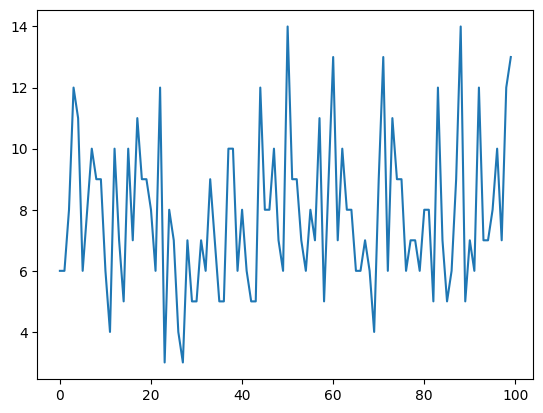


Epoca: 39

Recompensa de Media: 7.82 

1/1 [==============================] - 8s 8s/step - d_loss: -0.0509 - g_loss: -0.3751
Epoch 41/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0519 - g_loss: -0.5492
Epoch 42/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0540 - g_loss: -0.4254
Epoch 43/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0562 - g_loss: -0.4939
Epoch 44/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0579 - g_loss: -0.4571
Epoch 45/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0594 - g_loss: -0.4821
Epoch 46/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0608 - g_loss: -0.4476
Epoch 47/100
tf.Tensor(2000, shape=(), dtype=i

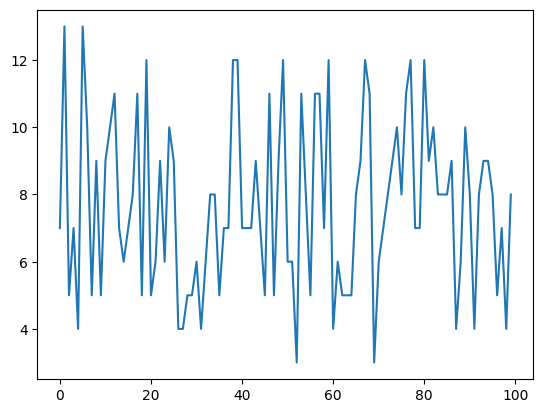


Epoca: 49

Recompensa de Media: 7.68 

1/1 [==============================] - 8s 8s/step - d_loss: -0.0605 - g_loss: -0.3481
Epoch 51/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0644 - g_loss: -0.4958
Epoch 52/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0694 - g_loss: -0.4925
Epoch 53/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0708 - g_loss: -0.4117
Epoch 54/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0717 - g_loss: -0.5177
Epoch 55/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0731 - g_loss: -0.4097
Epoch 56/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0746 - g_loss: -0.5127
Epoch 57/100
tf.Tensor(2000, shape=(), dtype=i

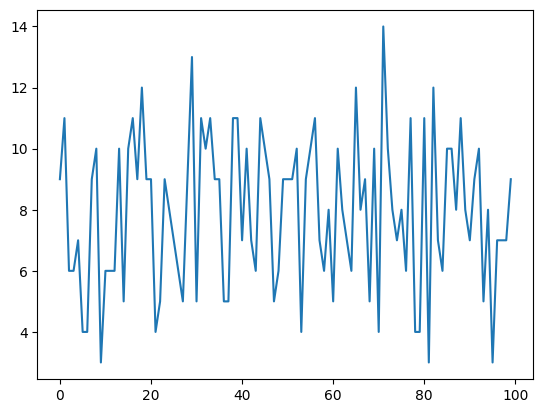


Epoca: 59

Recompensa de Media: 7.92 

1/1 [==============================] - 8s 8s/step - d_loss: -0.0797 - g_loss: -0.5493
Epoch 61/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0809 - g_loss: -0.3766
Epoch 62/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0829 - g_loss: -0.5161
Epoch 63/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0854 - g_loss: -0.4162
Epoch 64/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0876 - g_loss: -0.4841
Epoch 65/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0895 - g_loss: -0.4249
Epoch 66/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0911 - g_loss: -0.4922
Epoch 67/100
tf.Tensor(2000, shape=(), dtype=i

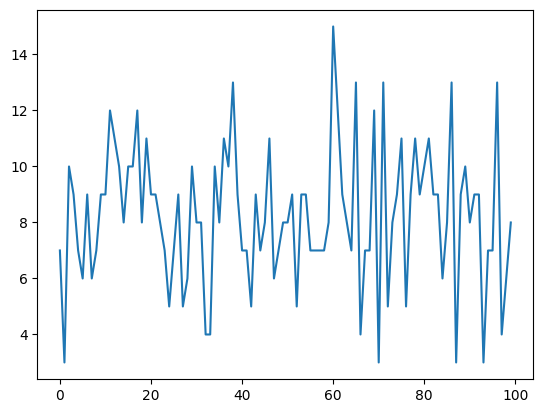


Epoca: 69

Recompensa de Media: 8.24 

1/1 [==============================] - 7s 7s/step - d_loss: -0.0916 - g_loss: -0.5414
Epoch 71/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.0962 - g_loss: -0.4158
Epoch 72/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1005 - g_loss: -0.4428
Epoch 73/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1026 - g_loss: -0.4733
Epoch 74/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1040 - g_loss: -0.4083
Epoch 75/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1053 - g_loss: -0.5006
Epoch 76/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1063 - g_loss: -0.3681
Epoch 77/100
tf.Tensor(2000, shape=(), dtype=i

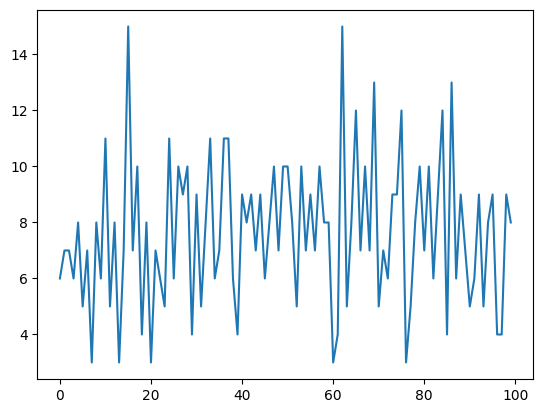


Epoca: 79

Recompensa de Media: 7.63 

1/1 [==============================] - 8s 8s/step - d_loss: -0.1124 - g_loss: -0.4064
Epoch 81/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1159 - g_loss: -0.4524
Epoch 82/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 6s 6s/step - d_loss: -0.1183 - g_loss: -0.4384
Epoch 83/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1202 - g_loss: -0.4341
Epoch 84/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1220 - g_loss: -0.4488
Epoch 85/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1238 - g_loss: -0.4128
Epoch 86/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1255 - g_loss: -0.4926
Epoch 87/100
tf.Tensor(2000, shape=(), dtype=i

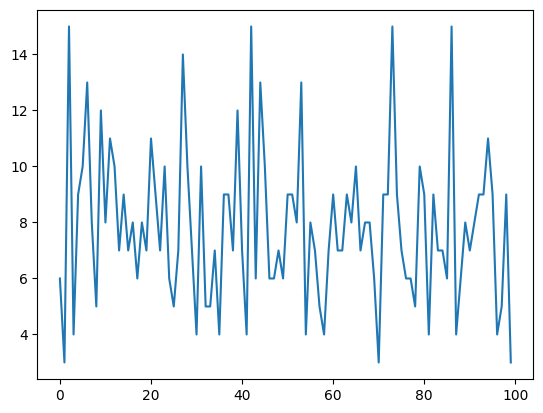


Epoca: 89

Recompensa de Media: 7.85 

1/1 [==============================] - 8s 8s/step - d_loss: -0.1292 - g_loss: -0.4262
Epoch 91/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1351 - g_loss: -0.4834
Epoch 92/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1355 - g_loss: -0.3709
Epoch 93/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1366 - g_loss: -0.4810
Epoch 94/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1391 - g_loss: -0.3888
Epoch 95/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1415 - g_loss: -0.4619
Epoch 96/100
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 5s 5s/step - d_loss: -0.1437 - g_loss: -0.3900
Epoch 97/100
tf.Tensor(2000, shape=(), dtype=i

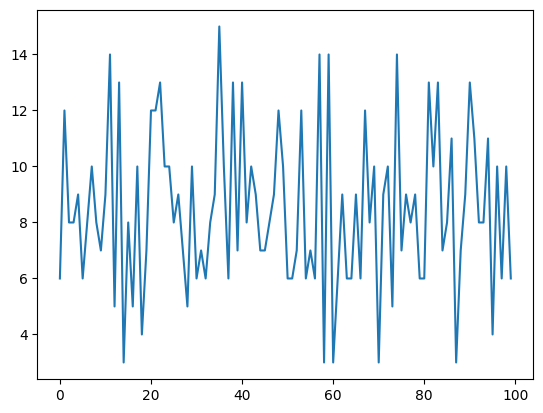


Epoca: 99

Recompensa de Media: 8.46 

1/1 [==============================] - 8s 8s/step - d_loss: -0.1451 - g_loss: -0.3129


In [ ]:
# Deshabilitar los mensajes de información de TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Deshabilitar los mensajes de información de OpenAI Gym
gym.logger.set_level(40)


# Cambiar batch_size
history=gan.fit(XTrain,
    epochs=EPOCHS, batch_size=2000)#, # callbacks=[WandbCallback()])

## Evaluación del Discriminador

In [ ]:
# Evaluamos el Discriminador en el TEST
gan.evaluate_D(XTest)

16/16 [==============================] - 0s 2ms/step - loss: -0.6871 - accuracy: 0.0000e+00
>Accuracy real: 0%, fake: 0%
>Loss real: 
-0.5410119295120239
>Loss fake: 
-0.6870831847190857


## Evaluación del Generador

Episode  0 Total reward: 11.0
Episode  1 Total reward: 6.0
Episode  2 Total reward: 7.0
Episode  3 Total reward: 10.0
Episode  4 Total reward: 9.0
Episode  5 Total reward: 14.0
Episode  6 Total reward: 9.0
Episode  7 Total reward: 5.0
Episode  8 Total reward: 6.0
Episode  9 Total reward: 4.0
Episode  10 Total reward: 12.0
Episode  11 Total reward: 7.0
Episode  12 Total reward: 3.0
Episode  13 Total reward: 8.0
Episode  14 Total reward: 13.0
Episode  15 Total reward: 9.0
Episode  16 Total reward: 7.0
Episode  17 Total reward: 5.0
Episode  18 Total reward: 7.0
Episode  19 Total reward: 13.0
Episode  20 Total reward: 4.0
Episode  21 Total reward: 12.0
Episode  22 Total reward: 4.0
Episode  23 Total reward: 4.0
Episode  24 Total reward: 10.0
Episode  25 Total reward: 8.0
Episode  26 Total reward: 13.0
Episode  27 Total reward: 8.0
Episode  28 Total reward: 6.0
Episode  29 Total reward: 10.0
Episode  30 Total reward: 5.0
Episode  31 Total reward: 8.0
Episode  32 Total reward: 7.0
Episode  3

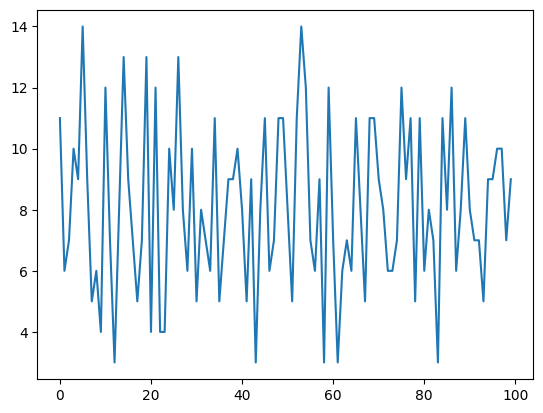

8.07

In [ ]:
gan.evaluate_G()